In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('dataset/general_data.csv')

In [3]:
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      4410 non-null   int64  
 1   Attrition                4410 non-null   object 
 2   BusinessTravel           4410 non-null   object 
 3   Department               4410 non-null   object 
 4   DistanceFromHome         4410 non-null   int64  
 5   Education                4410 non-null   int64  
 6   EducationField           4410 non-null   object 
 7   EmployeeCount            4410 non-null   int64  
 8   EmployeeID               4410 non-null   int64  
 9   Gender                   4410 non-null   object 
 10  JobLevel                 4410 non-null   int64  
 11  JobRole                  4410 non-null   object 
 12  MaritalStatus            4410 non-null   object 
 13  MonthlyIncome            4410 non-null   int64  
 14  NumCompaniesWorked      

None

In [4]:
df.describe()

,Age,DistanceFromHome,Education,EmployeeCount,EmployeeID,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
count,4410.000000,4410.000000,4410.000000,4410.0,4410.000000,4410.000000,4410.000000,4391.000000,4410.000000,4410.0,4410.000000,4401.000000,4410.000000,4410.000000,4410.000000,4410.000000
mean,36.923810,9.192517,2.912925,1.0,2205.500000,2.063946,65029.312925,2.694830,15.209524,8.0,0.793878,11.279936,2.799320,7.008163,2.187755,4.123129
std,9.133301,8.105026,1.023933,0.0,1273.201673,1.106689,47068.888559,2.498887,3.659108,0.0,0.851883,7.782222,1.288978,6.125135,3.221699,3.567327
min,18.000000,1.000000,1.000000,1.0,1.000000,1.000000,10090.000000,0.000000,11.000000,8.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,2.000000,2.000000,1.0,1103.250000,1.000000,29110.000000,1.000000,12.000000,8.0,0.000000,6.000000,2.000000,3.000000,0.000000,2.000000
50%,36.000000,7.000000,3.000000,1.0,2205.500000,2.000000,49190.000000,2.000000,14.000000,8.0,1.000000,10.000000,3.000000,5.000000,1.000000,3.000000
75%,43.000000,14.000000,4.000000,1.0,3307.750000,3.000000,83800.000000,4.000000,18.000000,8.0,1.000000,15.000000,3.000000,9.000000,3.000000,7.000000
max,60.000000,29.000000,5.000000,1.0,4410.000000,5.000000,199990.000000,9.000000,25.000000,8.0,3.000000,40.000000,6.000000,40.000000,15.000000,17.000000


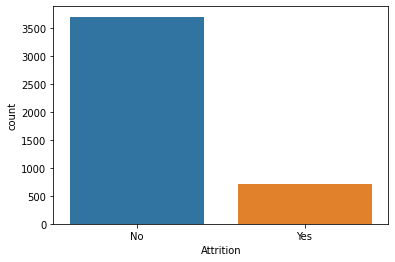

In [5]:
sns.countplot(df.Attrition)
plt.show()

In [6]:
for i in df:
    unique_val = df[i].nunique()
    if unique_val == 1:
        print(i, 'number of unique value :', unique_val)

# below items are unnecessary colomns, we have to drop

EmployeeCount number of unique value : 1
Over18 number of unique value : 1
StandardHours number of unique value : 1


In [7]:
# drop unnecessary colomns

unnecessary_colomns = ['EmployeeID', 'EmployeeCount', 'StandardHours' , 'Over18']
df.drop(unnecessary_colomns, axis =1, inplace=True)

In [8]:
df.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,Female,1,Healthcare Representative,Married,131160,1.0,11,0,1.0,6,1,0,0
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,Female,1,Research Scientist,Single,41890,0.0,23,1,6.0,3,5,1,4
2,32,No,Travel_Frequently,Research & Development,17,4,Other,Male,4,Sales Executive,Married,193280,1.0,15,3,5.0,2,5,0,3
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,Male,3,Human Resources,Married,83210,3.0,11,3,13.0,5,8,7,5
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,Male,1,Sales Executive,Single,23420,4.0,12,2,9.0,2,6,0,4


### Converted Columns with object type

In [9]:
# find columns with object value

columns_object = []
for i in df :
    if (df[i]).dtype == 'O':
        columns_object.append(i)
        print(i, '__ need to be converted')

Attrition __ need to be converted
BusinessTravel __ need to be converted
Department __ need to be converted
EducationField __ need to be converted
Gender __ need to be converted
JobRole __ need to be converted
MaritalStatus __ need to be converted


In [10]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

att_converted = label_encoder.fit_transform(df[columns_object[0]])
print(label_encoder.classes_)
print(att_converted)

print('---------')
buss_converted = label_encoder.fit_transform(df[columns_object[1]])
print(label_encoder.classes_)
print(buss_converted)

print('---------')
dep_converted = label_encoder.fit_transform(df[columns_object[2]])
print(label_encoder.classes_)
print(dep_converted)

print('---------')

edu_converted = label_encoder.fit_transform(df[columns_object[3]])
print(label_encoder.classes_)
print(edu_converted)

print('---------')

gender_converted = label_encoder.fit_transform(df[columns_object[4]])
print(label_encoder.classes_)
print(gender_converted)


print('---------')

job_converted = label_encoder.fit_transform(df[columns_object[5]])
print(label_encoder.classes_)
print(job_converted)

print('---------')

marital_converted = label_encoder.fit_transform(df[columns_object[6]])
print(label_encoder.classes_)
print(marital_converted)

['No' 'Yes']
[0 1 0 ... 0 0 0]
---------
['Non-Travel' 'Travel_Frequently' 'Travel_Rarely']
[2 1 1 ... 2 2 2]
---------
['Human Resources' 'Research & Development' 'Sales']
[2 1 1 ... 1 2 1]
---------
['Human Resources' 'Life Sciences' 'Marketing' 'Medical' 'Other'
 'Technical Degree']
[1 1 4 ... 1 3 3]
---------
['Female' 'Male']
[0 0 1 ... 1 1 1]
---------
['Healthcare Representative' 'Human Resources' 'Laboratory Technician'
 'Manager' 'Manufacturing Director' 'Research Director'
 'Research Scientist' 'Sales Executive' 'Sales Representative']
[0 6 7 ... 7 2 2]
---------
['Divorced' 'Married' 'Single']
[1 2 1 ... 1 0 0]


In [11]:
df_converted = df.copy()

In [12]:
columns_object

['Attrition',
 'BusinessTravel',
 'Department',
 'EducationField',
 'Gender',
 'JobRole',
 'MaritalStatus']

In [13]:
df_converted.Attrition = att_converted
df_converted.BusinessTravel = buss_converted
df_converted.Department = dep_converted
df_converted.EducationField = edu_converted
df_converted.Gender = gender_converted
df_converted.JobRole = job_converted
df_converted.MaritalStatus = marital_converted

In [14]:
df_converted.info()

# Now all feature is numeric

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      4410 non-null   int64  
 1   Attrition                4410 non-null   int64  
 2   BusinessTravel           4410 non-null   int64  
 3   Department               4410 non-null   int64  
 4   DistanceFromHome         4410 non-null   int64  
 5   Education                4410 non-null   int64  
 6   EducationField           4410 non-null   int64  
 7   Gender                   4410 non-null   int64  
 8   JobLevel                 4410 non-null   int64  
 9   JobRole                  4410 non-null   int64  
 10  MaritalStatus            4410 non-null   int64  
 11  MonthlyIncome            4410 non-null   int64  
 12  NumCompaniesWorked       4391 non-null   float64
 13  PercentSalaryHike        4410 non-null   int64  
 14  StockOptionLevel        

### Fill missing value

In [15]:
df_converted.columns[np.where(df_converted.isnull().sum() > 0)]

# this 2 columns have missing values

Index(['NumCompaniesWorked', 'TotalWorkingYears'], dtype='object')

In [16]:
df_converted[['NumCompaniesWorked', 'TotalWorkingYears']].describe()

,NumCompaniesWorked,TotalWorkingYears
count,4391.000000,4401.000000
mean,2.694830,11.279936
std,2.498887,7.782222
min,0.000000,0.000000
25%,1.000000,6.000000
50%,2.000000,10.000000
75%,4.000000,15.000000
max,9.000000,40.000000


In [17]:
display(df_converted.NumCompaniesWorked.mode())
display(df_converted.TotalWorkingYears.mode())

0    1.0
dtype: float64

0    10.0
dtype: float64

In [18]:
# fill with mode values

df_converted.NumCompaniesWorked.fillna(df_converted.NumCompaniesWorked.mode()[0], inplace=True)
df_converted.TotalWorkingYears.fillna(df_converted.TotalWorkingYears.mode()[0], inplace=True)

In [19]:
# Recheck, now all column is totally filled
df_converted.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      4410 non-null   int64  
 1   Attrition                4410 non-null   int64  
 2   BusinessTravel           4410 non-null   int64  
 3   Department               4410 non-null   int64  
 4   DistanceFromHome         4410 non-null   int64  
 5   Education                4410 non-null   int64  
 6   EducationField           4410 non-null   int64  
 7   Gender                   4410 non-null   int64  
 8   JobLevel                 4410 non-null   int64  
 9   JobRole                  4410 non-null   int64  
 10  MaritalStatus            4410 non-null   int64  
 11  MonthlyIncome            4410 non-null   int64  
 12  NumCompaniesWorked       4410 non-null   float64
 13  PercentSalaryHike        4410 non-null   int64  
 14  StockOptionLevel        

In [20]:
df_converted.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'Gender', 'JobLevel', 'JobRole',
       'MaritalStatus', 'MonthlyIncome', 'NumCompaniesWorked',
       'PercentSalaryHike', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'YearsAtCompany', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [21]:
import statsmodels.api as sm

In [22]:
X = df_converted.drop('Attrition', axis =1)
y = df_converted['Attrition']

In [23]:
X1 = sm.add_constant(X)

In [24]:
Logistic = sm.Logit(y, X1)

result = Logistic.fit()

Optimization terminated successfully.
         Current function value: 0.393044
         Iterations 7


In [25]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              Attrition   No. Observations:                 4410
Model:                          Logit   Df Residuals:                     4390
Method:                           MLE   Df Model:                           19
Date:                Tue, 11 Aug 2020   Pseudo R-squ.:                  0.1101
Time:                        00:52:36   Log-Likelihood:                -1733.3
converged:                       True   LL-Null:                       -1947.9
Covariance Type:            nonrobust   LLR p-value:                 3.814e-79
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                       0.0782      0.414      0.189      0.850      -0.733       0.889
Age                        -0.0309      0.007     -4.523      0.000      -0.044      -0.018
BusinessTravel             -0.0178      0.065     -0.271      0.786      -0.146       0.111
Department                 -0.2422      0.081     -2.980      0.003      -0.401      -0.083
DistanceFromHome           -0.0013      0.005     -0.247      0.805      -0.012       0.009
Education                  -0.0626      0.043     -1.470      0.142      -0.146       0.021
EducationField             -0.0965      0.033     -2.891      0.004      -0.162      -0.031
Gender                      0.0862      0.090      0.963      0.336      -0.089       0.262
JobLevel                   -0.0237      0.040     -0.600      0.549      -0.101       0.054
JobRole                     0.0378      0.018      2.109      0.035       0.003       0.073
MaritalStatus               0.5884      0.063      9.318      0.000       0.465       0.712
MonthlyIncome           -1.879e-06   9.56e-07     -1.966      0.049   -3.75e-06   -5.29e-09
NumCompaniesWorked          0.1157      0.018      6.311      0.000       0.080       0.152
PercentSalaryHike           0.0118      0.012      1.002      0.316      -0.011       0.035
StockOptionLevel           -0.0640      0.052     -1.239      0.215      -0.165       0.037
TotalWorkingYears          -0.0574      0.012     -4.821      0.000      -0.081      -0.034
TrainingTimesLastYear      -0.1468      0.035     -4.175      0.000      -0.216      -0.078
YearsAtCompany              0.0119      0.018      0.652      0.514      -0.024       0.048
YearsSinceLastPromotion     0.1322      0.020      6.457      0.000       0.092       0.172
YearsWithCurrManager       -0.1395      0.022     -6.309      0.000      -0.183      -0.096
===========================================================================================
"""

In [26]:
dfresult = pd.read_html(result.summary().tables[1].as_html(), header=0, index_col=0)[0]
dfresult

,coef,std err,z,P>|z|,[0.025,0.975]
const,0.078200,4.140000e-01,0.189,0.850,-0.733000,8.890000e-01
Age,-0.030900,7.000000e-03,-4.523,0.000,-0.044000,-1.800000e-02
BusinessTravel,-0.017800,6.500000e-02,-0.271,0.786,-0.146000,1.110000e-01
Department,-0.242200,8.100000e-02,-2.980,0.003,-0.401000,-8.300000e-02
DistanceFromHome,-0.001300,5.000000e-03,-0.247,0.805,-0.012000,9.000000e-03
Education,-0.062600,4.300000e-02,-1.470,0.142,-0.146000,2.100000e-02
EducationField,-0.096500,3.300000e-02,-2.891,0.004,-0.162000,-3.100000e-02
Gender,0.086200,9.000000e-02,0.963,0.336,-0.089000,2.620000e-01
JobLevel,-0.023700,4.000000e-02,-0.600,0.549,-0.101000,5.400000e-02
JobRole,0.037800,1.800000e-02,2.109,0.035,0.003000,7.300000e-02


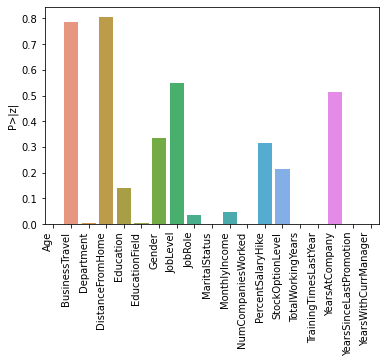

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt
plot = sns.barplot(x = dfresult.index[1:], y= dfresult['P>|z|'].drop('const', axis =0))
plot.set_xticklabels(plot.get_xticklabels(), rotation=90, horizontalalignment='right')


plt.show()

## Significant Independent Value with p value < 0.05

In [28]:
dfresult[dfresult['P>|z|'] < 0.05]

,coef,std err,z,P>|z|,[0.025,0.975]
Age,-0.030900,7.000000e-03,-4.523,0.000,-0.044000,-1.800000e-02
Department,-0.242200,8.100000e-02,-2.980,0.003,-0.401000,-8.300000e-02
EducationField,-0.096500,3.300000e-02,-2.891,0.004,-0.162000,-3.100000e-02
JobRole,0.037800,1.800000e-02,2.109,0.035,0.003000,7.300000e-02
MaritalStatus,0.588400,6.300000e-02,9.318,0.000,0.465000,7.120000e-01
MonthlyIncome,-0.000002,9.560000e-07,-1.966,0.049,-0.000004,-5.290000e-09
NumCompaniesWorked,0.115700,1.800000e-02,6.311,0.000,0.080000,1.520000e-01
TotalWorkingYears,-0.057400,1.200000e-02,-4.821,0.000,-0.081000,-3.400000e-02
TrainingTimesLastYear,-0.146800,3.500000e-02,-4.175,0.000,-0.216000,-7.800000e-02
YearsSinceLastPromotion,0.132200,2.000000e-02,6.457,0.000,0.092000,1.720000e-01


## Final Equation is

p('Attrition') = 1/(1 + e^-(0.078200 -0.0309(Age) -0.2422(Department) -0.0965(EducationField) +     
                     0.0378(JobRole) + 0.5884(MaritalStatus) -1.8790000000000001e-06(MonthlyIncome) + 
                     0.1157(NumCompaniesWorked) -0.0574(TotalWorkingYears) -0.1468(TrainingTimesLastYear) + 
                     0.1322(YearsSinceLastPromotion) -0.1395(YearsWithCurrManager) ))